<a href="https://colab.research.google.com/github/Marcellus46/RNA_MULTILAYER_PERCEPTRON_MULTIPLAS_CAMADAS/blob/main/RNA_MULTILAYER_PERCEPTRON_MULTIPLAS_CAMADAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Importação Biblioteca Python***

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### **Iniciando Amostras de RNA Multiplas Camadas**

In [3]:
neur=2

alfa=0.01

errotolerado=0.01

listaciclo=[]

listaerro=[]

### **Definindo Array para RNA Multiplas Camadas**

In [4]:
x=np.array([[1.0,1.0],[1.0,-1.0],[-1.0,1.0],[-1.0,-1.0]])

(amostras,entradas)=np.shape(x)

# Redefinimos 't' para representar 4 amostras com 2 saídas alvo cada,
# alinhando-o com uma interpretação comum para problemas tipo XOR e consistência
# com as operações de backpropagation. A forma original de 't' (2,4) era inconsistente.
t=np.array([[1.0,-1.0],  # Saída esperada para [1.0,1.0] (por exemplo, classe 'azul')
            [1.0,-1.0],  # Saída esperada para [1.0,-1.0]
            [1.0,-1.0],  # Saída esperada para [-1.0,1.0]
            [-1.0,1.0]]) # Saída esperada para [-1.0,-1.0] (por exemplo, classe 'vermelha')

# Agora, 'vsai' representará corretamente o número de neurônios de saída (2).
# 'numclasses' é definido como 'vsai' para consistência na iteração sobre as saídas.
(amostras_temp, vsai)=np.shape(t) # amostras_temp será 4, vsai será 2
numclasses = vsai # Número de neurônios de saída

In [5]:
print(np.__version__)

2.0.2


In [6]:
vanterior=np.array([[-0.1,0.2],[0.2,-0.3]])

v0anterior=np.array([0.2,-0.1])

In [7]:
wanterior=np.array([[-0.3,-0.4],[0.2,-0.1]])

w0anterior=np.array([0.2,-0.1])

In [8]:
vnovo=np.zeros((entradas,neur))

v0novo=np.zeros((1,neur))

wnovo=np.zeros((neur,vsai))

w0novo=np.zeros((1,vsai))

In [9]:
zin=np.array(np.zeros((1,neur)),ndmin=2)

z=np.array(np.zeros((1,neur)),ndmin=2)

In [10]:
yin=np.array(np.zeros((1,vsai)),ndmin=2)

y=np.array(np.zeros((1,vsai)),ndmin=2)

In [11]:
deltinhak=np.zeros((vsai,1))

deltaw=np.zeros((vsai,neur))

deltaw0=np.zeros((vsai,1))

deltinha=np.zeros((1,neur))

In [12]:
target=np.zeros((vsai,1))

dif1=np.zeros((vsai,1))

dif2=np.zeros((vsai,1))

dif3=np.zeros((vsai,1))

deltinha2=np.zeros((neur,1))

# Corrigido: xaux deve ter o mesmo número de colunas que 'entradas'
# para corresponder aos dados de entrada, não 'vsai'.
xaux=np.zeros((1,entradas))

### **Iniciando os Ciclos da RNA Multiplas Camadas**

In [13]:
ciclo=0

errototal=100000

In [14]:
while errototal>errotolerado:
    errototal=0

In [15]:
for padrao in range(amostras):

        zin=np.dot(x[padrao,:],vanterior)+v0anterior

        z=np.tanh(zin)

In [16]:
yin=np.dot(z,wanterior)+w0anterior

y=np.tanh(yin)

In [17]:
h = y.reshape(1,-1)

In [18]:
for m in range(numclasses):

    target[m][0]=t[padrao][m]

In [19]:
erro=0
for i in range(numclasses):

    erro=erro+((target[i][0]-h[0][i])**2)

    errototal=errototal+0.5*erro

In [20]:
deltinhak=(target[:numclasses]-h.T)*(1+h.T)*(1-h.T)

for i in range(numclasses):
      dif1[i][0]=target[i][0]-h[0][i]

for i in range(numclasses):
      dif2[i][0]=1+h[0][i]
      dif3[i][0]=1-h[0][i]

for i in range(numclasses):
      deltinhak[i]=dif1[i]*dif2[i]*dif3[i]

In [21]:
deltaw=alfa*(np.dot(deltinhak,z.reshape(1,-1))) #
deltaw0=alfa*deltinhak

deltinhain=np.dot(np.transpose(deltinhak),np.transpose(wanterior))
deltinha=deltinhain*(1+z)*(1-z)

for m in range(neur):
      deltinha2[m][0]=deltinha[0][m]

for k in range(entradas):
            xaux[0][k]=x[padrao][k]

deltav=alfa*np.dot(deltinha2,xaux)
deltav0=alfa*deltinha

In [22]:
vnovo=vanterior+np.transpose(deltav)

v0novo=v0anterior+deltav0

wnovo=wanterior+np.transpose(deltaw)

In [23]:
w0novo=w0anterior+np.transpose(deltaw0)

vanterior=vnovo

v0anterior=v0novo

wanterior=wnovo

w0anterior=w0novo

y=h

In [24]:
ciclo=ciclo+1

print("Ciclo: ",ciclo,"  Erro:",erro)

listaciclo.append(ciclo)
listaerro.append(errototal)


Ciclo:  1   Erro: 2.662575342108835


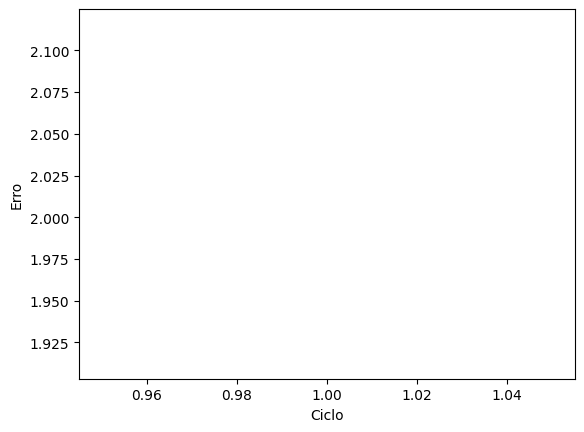

In [25]:
plt.plot(listaciclo,listaerro)
plt.xlabel('Ciclo')
plt.ylabel('Erro')
plt.show()

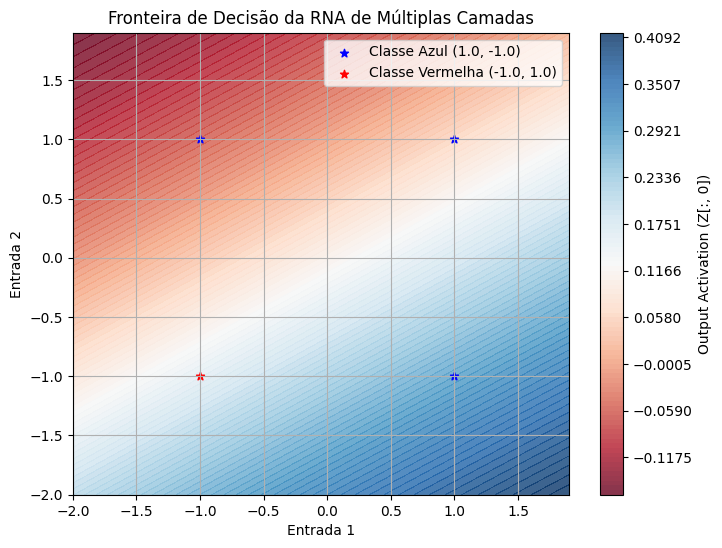

In [26]:
# Gerando a grade de pontos para a visualização da fronteira de decisão
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
vx, vy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Calculando a saída da rede para cada ponto da grade
Z_temp = np.c_[vx.ravel(), vy.ravel()]

# Prepare an empty array to store the network's output for the grid points
Z = np.zeros((Z_temp.shape[0], vsai))

# Pass each grid point through the network
for i, point in enumerate(Z_temp):
    zin_grid = np.dot(point, vanterior) + v0anterior
    z_grid = np.tanh(zin_grid)
    yin_grid = np.dot(z_grid, wanterior) + w0anterior
    y_grid = np.tanh(yin_grid)
    Z[i] = y_grid # Store the output for the current grid point

# Para visualização, vamos considerar a classe que tem a maior ativação de saída
# Se houver mais de uma saída, isso pode ser interpretado como a classe dominante.
# No seu caso, 't' tem 2 saídas. Vamos usar a diferença ou a primeira saída para colorir.
# Para simplificar a visualização em 2D para um problema XOR-like,
# vamos usar a primeira saída como discriminador.
# Uma abordagem comum para classificação é usar argmax se as saídas forem probabilidades,
# mas aqui, como as saídas são tanh, vamos considerar o sinal ou uma das saídas.

# Uma maneira simples de visualizar a fronteira para problemas binários com 2 saídas:
# Se a primeira saída for maior que a segunda, ou se a primeira saída for positiva.
# Aqui, t[0] = [1, -1] e t[3] = [-1, 1], então 1 vs -1 e -1 vs 1.
# Podemos usar a diferença entre as saídas ou a primeira saída para decidir a cor.
# Por exemplo, se Z[:, 0] > Z[:, 1] (ou Z[:, 0] > 0), uma classe, senão outra.

# Considerando que a primeira saída de 't' é 1.0 para as três primeiras amostras e -1.0 para a última.
# E a segunda saída de 't' é -1.0 para as três primeiras amostras e 1.0 para a última.
# Podemos decidir a classe baseada no sinal da primeira saída ou na maior saída.

# Para visualização, podemos mapear as saídas para 0 ou 1, ou usar diretamente as saídas como cores.
# Vamos usar a primeira saída para determinar a classe de cada ponto na grade.
# Se a saída for próxima de 1, classificamos como 'azul' (por exemplo), se -1, como 'vermelho'.
Z_plot = Z[:, 0].reshape(vx.shape) # Usando a primeira saída para o plot de contorno

plt.figure(figsize=(8, 6))
plt.contourf(vx, vy, Z_plot, levels=np.linspace(Z_plot.min(), Z_plot.max(), 100), cmap=plt.cm.RdBu, alpha=0.8)
plt.colorbar(label='Output Activation (Z[:, 0])')

# Plotando os pontos de entrada
plt.scatter(x[0, 0], x[0, 1], marker="*", color='blue', label='Classe Azul (1.0, -1.0)')
plt.scatter(x[1, 0], x[1, 1], marker="*", color='blue')
plt.scatter(x[2, 0], x[2, 1], marker="*", color='blue')
plt.scatter(x[3, 0], x[3, 1], marker="*", color='red', label='Classe Vermelha (-1.0, 1.0)')

plt.xlabel('Entrada 1')
plt.ylabel('Entrada 2')
plt.title('Fronteira de Decisão da RNA de Múltiplas Camadas')
plt.legend()
plt.grid(True)
plt.show()